Logan Wongbangchuad,
Seth Boggess,
and Johnny Woehrle

In [470]:
#importing everything needed in this file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D

In [471]:
#This grabs the three data sets from our gethub for use to use in this file

#The main database
url = "https://raw.githubusercontent.com/LoganWongbangchuad/DataScience/main/dataset/NCHS_-_Leading_Causes_of_Death__United_States.csv"
OriginalDf = pd.read_csv(url)

#Database that has the Population of everystate from 1950 to 2019
url2 = "https://raw.githubusercontent.com/LoganWongbangchuad/DataScience/main/dataset/historical_state_population_by_year.csv"
PopulationDf = pd.read_csv(url2)

#Database that has the percentage of obisity of each state in the year 2013
url3 = "https://raw.githubusercontent.com/LoganWongbangchuad/DataScience/main/dataset/LakeCounty_Health_2397514566901885190.csv"
ObesityDf = pd.read_csv(url3)

#Merges the OriginalDf and ObesityDf into one database
df = pd.merge(OriginalDf, PopulationDf, on=['State', 'Year'], how='inner')
df.drop('113 Cause Name', axis=1, inplace=True)

In [472]:
#Code that cleans the df taking out columns not needed.
#This also makes two dataframes. df_allCauses is only where Cause type is All Causes and df_cleaned is the rest of the Cause names

# Deleting rows where state is 'District of Columbia'
df_cleaned = df[df['State'] != 'District of Columbia']
df_cleaned = df_cleaned[df_cleaned['State'] != 'United States']
# Deleting rows where 'cause_name' is 'all causes'
df_cleaned = df_cleaned[df_cleaned['Cause Name'] != 'All causes']

df_allCauses = df[df['State'] != 'District of Columbia']
df_allCauses = df_allCauses[df_allCauses['State'] != 'United States']
# Deleting rows where 'cause_name' is not 'all causes'
df_allCauses = df_allCauses[df_allCauses['Cause Name'] == 'All causes']
# Initialize Label Encoder
label_encoder = LabelEncoder()

# Fit and transform the 'Cause Name' column
df_cleaned['Cause Name Encoded'] = label_encoder.fit_transform(df_cleaned['Cause Name'])

df_cleaned.describe()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9500 entries, 0 to 10658
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     9500 non-null   int64  
 1   Cause Name               9500 non-null   object 
 2   State                    9500 non-null   object 
 3   Deaths                   9500 non-null   int64  
 4   Age-adjusted Death Rate  9500 non-null   float64
 5   Population               9500 non-null   int64  
 6   Cause Name Encoded       9500 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 593.8+ KB


In [473]:
#This makes a dataset that averages the Death, population and Age-adjusted Death Rate for each state and cause name
df_condensed = df_cleaned.groupby(['State', 'Cause Name']).agg({
    'Age-adjusted Death Rate': 'mean',
    'Deaths': 'mean',
    'Population' : 'mean'
}).reset_index()

print(df_condensed)

       State               Cause Name  Age-adjusted Death Rate        Deaths  \
0    Alabama      Alzheimer's disease                31.315789   1536.842105   
1    Alabama                     CLRD                52.510526   2698.000000   
2    Alabama                   Cancer               194.773684  10062.631579   
3    Alabama                 Diabetes                26.400000   1332.421053   
4    Alabama            Heart disease               254.447368  12660.157895   
..       ...                      ...                      ...           ...   
495  Wyoming  Influenza and pneumonia                22.431579    117.105263   
496  Wyoming           Kidney disease                11.384211     61.736842   
497  Wyoming                   Stroke                42.726316    223.631579   
498  Wyoming                  Suicide                21.700000    118.368421   
499  Wyoming   Unintentional injuries                56.905263    311.210526   

       Population  
0    4.674425e+06  

In [474]:
#This merges ObesityDf and df_cleaned into a dataframe called YearObesity
ObesityDf = ObesityDf[ObesityDf['NAME'] != 'District of Columbia']
ObesityDf = ObesityDf.rename(columns={'NAME': 'State'})
ObesityDf['Year'] = 2013

YearObesity = pd.merge(df_cleaned, ObesityDf, on=['Year', 'State'])
YearObesity.describe()
label_encoder = LabelEncoder()

# Fit and transform the 'Cause Name' column
YearObesity['Cause Name Encoded'] = label_encoder.fit_transform(YearObesity['Cause Name'])
YearObesity

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate,Population,Cause Name Encoded,OBJECTID,Obesity,Shape__Area,Shape__Length
0,2013,Unintentional injuries,Alabama,2329,47.2,4830081,9,38,35.6,1.442807e+12,5.750658e+06
1,2013,Unintentional injuries,Alaska,353,52.5,737068,9,14,29.8,5.301139e+11,6.663727e+06
2,2013,Unintentional injuries,Arizona,3349,48.6,6632764,9,43,28.4,3.562686e+12,8.044184e+06
3,2013,Unintentional injuries,Arkansas,1373,44.8,2959400,9,24,34.5,1.488699e+12,5.707634e+06
4,2013,Unintentional injuries,California,11538,29.2,38260787,9,2,24.2,5.327809e+12,1.451870e+07
...,...,...,...,...,...,...,...,...,...,...,...
495,2013,Kidney disease,Virginia,1547,18.0,8252427,6,7,29.2,1.158804e+12,7.710804e+06
496,2013,Kidney disease,Washington,461,6.1,6963985,6,18,26.4,2.214215e+12,7.508967e+06
497,2013,Kidney disease,West Virginia,450,18.6,1853914,6,31,35.6,6.851674e+11,5.374280e+06
498,2013,Kidney disease,Wisconsin,993,14.0,5736754,6,5,30.7,1.567816e+12,6.806782e+06


# (1) Identify two attributes in the consumable usage dataset and develop a linear regression model using the identified attributes and sklearn.linear_model.LinearRegression. Measure the performance of the model and make sure that the model performance is high. Draw a plot using matplotlib to show the observed and the predicted values.


The following code uses sklearn.linear_model.LinearRegression comaring Obisity and Age-Adjusted Death Rate for each State and Cause of death in the year 2013.

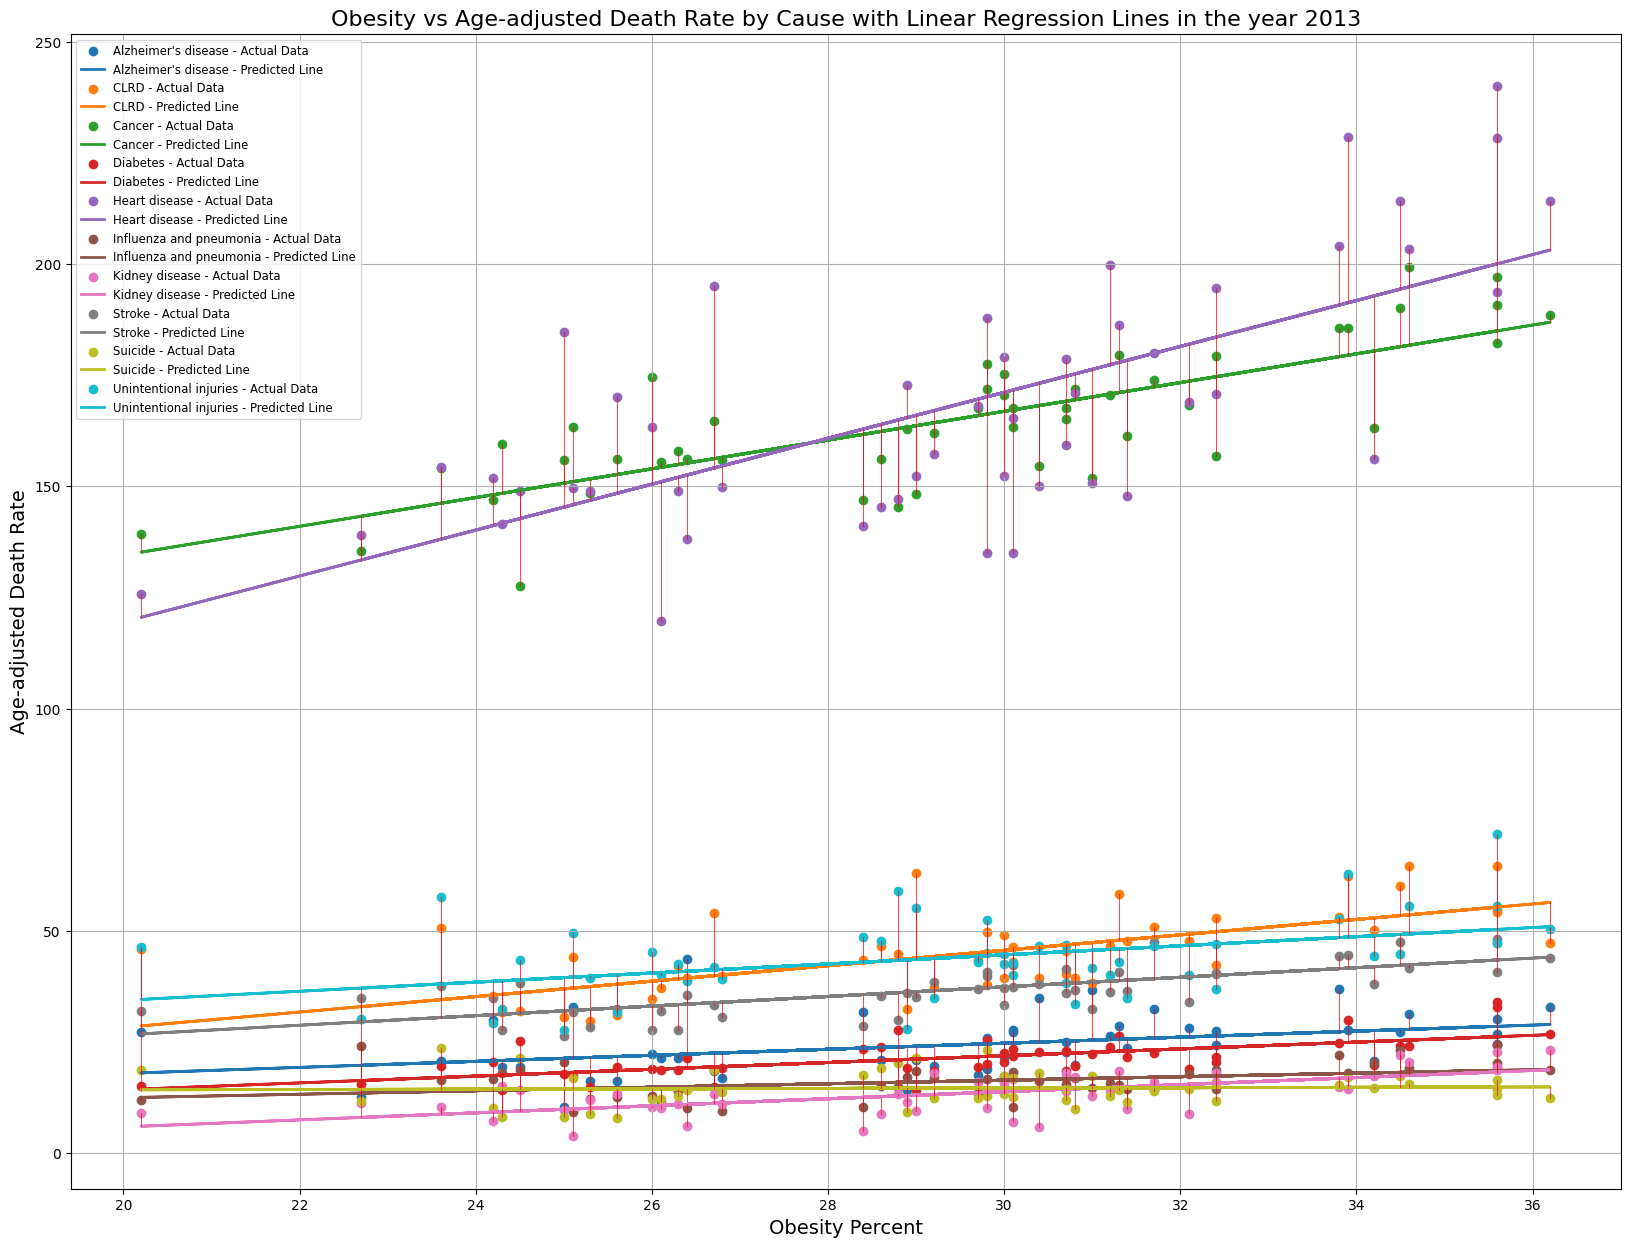

In [475]:

# Setting up the LinearRegression model
linModel = LinearRegression()

# Plotting each cause separately
plt.figure(figsize=(20, 15))
for cause, data in YearObesity.groupby('Cause Name'):
    # Extracting specific cause data
    Obesity = data[['Obesity']]
    Aadr = data[['Age-adjusted Death Rate']]

    # Fitting and predicting
    linModel.fit(Obesity, Aadr)
    yPredicted = linModel.predict(Obesity)

    # Plotting data points and regression line for this cause
    plt.scatter(Obesity, Aadr, label=f'{cause} - Actual Data')
    plt.plot(Obesity, yPredicted, linewidth=2, label=f'{cause} - Predicted Line')

    # Plotting the red error lines for this cause
    for i in range(len(Obesity)):
        plt.plot([Obesity.iloc[i, 0], Obesity.iloc[i, 0]], [Aadr.iloc[i, 0], yPredicted[i, 0]], color='red', linewidth=0.5)

# Adding labels and title
plt.xlabel('Obesity Percent', fontsize=14)
plt.ylabel('Age-adjusted Death Rate', fontsize=14)
plt.title('Obesity vs Age-adjusted Death Rate by Cause with Linear Regression Lines in the year 2013', fontsize=16)
plt.legend(fontsize='small')
plt.grid(True)

# Displaying the plot
plt.show()


The graph above demonstrates a positive trend between obesity and the Age-adjusted Death Rate across most causes. Among them, heart disease appears to be the most strongly associated with obesity, as indicated by the steep slope of the purple line.

# (2) Identify more than two attributes in the consumable usage dataset and develop a multiple linear regression model using the identified attributes and sklearn.linear_model.LinearRegression. Measure the performance of the model and make sure that the model performance is high. Draw a plot using mplot3d to show the observed and the predicted values.


I first stored relevant columns as variables, then I fit a least squares multiple linear regression model


In [476]:
X = df_cleaned[['Population', 'Cause Name Encoded']].values.reshape(-1, 2)
y = df_cleaned[['Deaths']].values.reshape(-1, 1)


after fitting the model, we wrote the least squares model as an equation to show how it came up with the predicited deaths


In [477]:
# Fit a least squares multiple linear regression model
linModel = LinearRegression()
linModel.fit(X, y)

# Write the least squares model as an equation
print(
    "Predicted Deaths = ",
    linModel.intercept_[0],
    " + ",
    linModel.coef_[0][0],
    "* (Population)",
    " + ",
    linModel.coef_[0][1],
    "* (Cause Name Encoded)",
)


Predicted Deaths =  2112.288337748211  +  0.0005605496518699974 * (Population)  +  -375.32448484848493 * (Cause Name Encoded)


This code generates a 3D scatter plot with a regression plane overlay. The regression plane code and np.meshgrid defines a meshgrid for the xPopulation and xCause (first two features in X), and calculates the yDeaths values using the linear model's coefficients and intercept. This creates a blue, semi-transparent regression surface that represents the predicted plane.


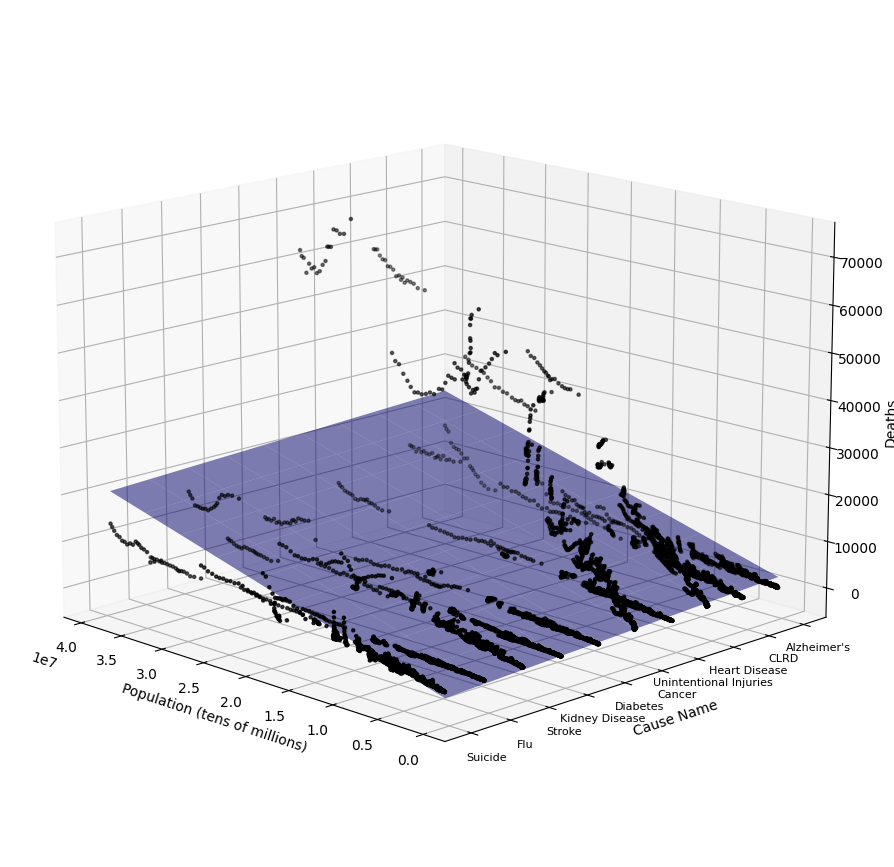

In [478]:
# Set up the figure
fig = plt.figure(figsize=(14, 11))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points (adjust the dot size with 's')
ax.scatter3D(X[:, 0], X[:, 1], y, color="black", s=5)  # s=10 controls dot size

# Plot the regression plane
xPopulation, xCause = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max(), 10),
    np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
)
yDeaths = (
    linModel.intercept_[0]
    + linModel.coef_[0][0] * xPopulation
    + linModel.coef_[0][1] * xCause
)
ax.plot_surface(xPopulation, xCause, yDeaths, color='blue', alpha=0.5)

# Set labels
ax.set_xlabel('Population (tens of millions)')
ax.set_ylabel('Cause Name')
ax.set_zlabel('Deaths')

# Example mapping for cause names
cause_name_mapping = {
    0: 'Alzheimer\'s',
    1: 'CLRD',
    2: 'Heart Disease',
    3: 'Unintentional Injuries',
    4: 'Cancer',
    5: 'Diabetes',
    6: 'Kidney Disease',
    7: 'Stroke',
    8: 'Flu',
    9: 'Suicide'
}

# Set y-axis ticks to the encoded values and labels to the cause names
ax.set_yticks(list(cause_name_mapping.keys()))  # Set the positions of the ticks
ax.set_yticklabels(list(cause_name_mapping.values()), fontsize=8)

# Reverse the x-axis to make population increase from right to left
#ax.invert_xaxis()

# Adjust view angle
ax.view_init(elev=15, azim=135)

# Show plot
plt.show()



The plot visualizes the relationship between population levels (scaled in tens of millions) and the corresponding death counts across various causes. It displays the observed data for deaths at different population levels and cause categories, while also illustrating the predictive model's estimates for death counts based on population size. This allows for a clear comparison between actual values and predicted outcomes, highlighting the impact of population size on mortality rates for each specific cause.

# (3) Develop a logistic regression model among some identified attributes in the consumable usage dataset and sklearn.linear_model.LogisticRegression. Measure the performance of the model and make sure that the model performance is high. Draw a plot using matplotlib to show the observed and the predicted values.


To develop a logistic regression model, we focused on the "Cause Name" column, categorizing "Suicide" as a value of 1 to represent intentional death, and "Unintentional Injuries" as 0 to signify unintentional deaths. We first created a subset of the dataset, referred to as the heartAndSuicide dataframe, which exclusively contained the causes "Suicide" and "Unintentional Injuries" for clarity and specificity in modeling.

To facilitate the logistic regression, we used the .loc method to convert all instances of "Suicide" into 1 and all instances of "Unintentional Injuries" into 0. This transformation allowed us to prepare the data for binary classification. Subsequently, we applied the fit method with np.ravel() to train the logistic regression model on the processed data.

For visual representation, we generated the xDelta array for input values and computed the predicted probabilities (yDeltaProb) using the predict_proba method. This enabled us to plot the logistic regression curve, illustrating the model's decision boundary. The plot was enhanced with a legend and grid for improved readability and interpretation of the results.

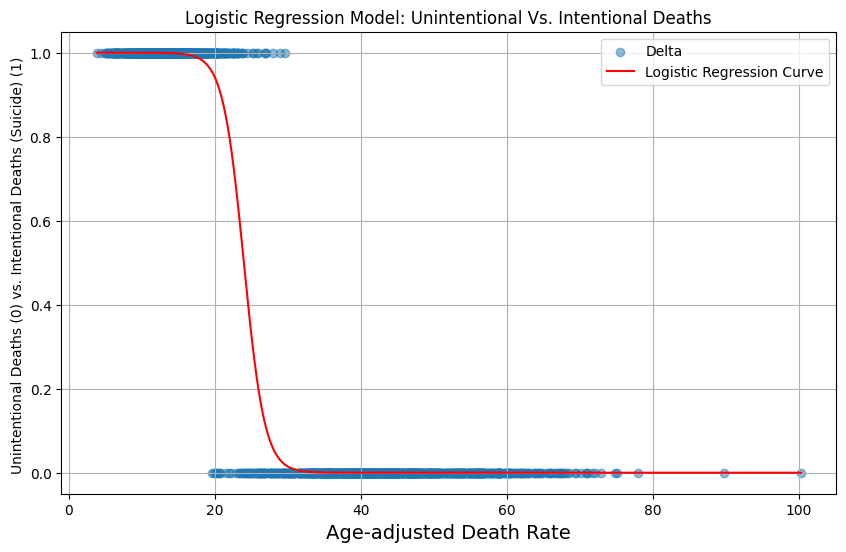

In [482]:
df_cleaned = df[df['State'] != 'United States']

logisticDf = df_cleaned[(df_cleaned['Cause Name'] == 'Suicide') | (df_cleaned['Cause Name'] == 'Unintentional injuries')]

logisticDf.loc[logisticDf['Cause Name'] == 'Suicide', 'Cause Name'] = 1
logisticDf.loc[logisticDf['Cause Name'] == 'Unintentional injuries', 'Cause Name'] = 0

X = logisticDf[['Age-adjusted Death Rate']].values.reshape(-1, 1) # No need to reshape
y = logisticDf['Cause Name'].values.reshape(-1, 1).astype(int)  # Dependent variable (binary classification)

# Logistic regression predicting cause of death by Age-Adjusted Death Rate
logisticModel = LogisticRegression()
logisticModel.fit(X, np.ravel(y))

plt.figure(figsize=(10, 6))

# Graph logistic regression probabilities
plt.scatter(X, y, label="Delta", alpha=0.5)
xDelta = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
yDeltaProb = logisticModel.predict_proba(xDelta)[:, 1]

# Plotting the logistic regression curve
plt.plot(xDelta, yDeltaProb, color='red', label='Logistic Regression Curve')

plt.xlabel('Age-adjusted Death Rate', fontsize=14)
plt.ylabel('Unintentional Deaths (0) vs. Intentional Deaths (Suicide) (1) ', fontsize=10)
plt.title('Logistic Regression Model: Unintentional Vs. Intentional Deaths', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

The logistic regression model enables us to predict whether a death was intentional or unintentional based on the age-adjusted death rate. As illustrated by the logistic regression curve, the model suggests that higher age-adjusted death rates are associated with a higher probability of the death being unintentional, while lower age-adjusted death rates are more strongly correlated with intentional deaths (Suicides). This relationship highlights the role of age-adjusted death rates in distinguishing between the two categories of death, providing valuable insights for further analysis and decision-making.

# Conclusion

The linear regression model (1) demonstrates a positive trend between obesity and the age-adjusted death rate across most causes. Among them, heart disease appears to be the most strongly associated with obesity, as indicated by the steep slope of the purple line.

The multiple linear regression model(2) visualizes the relationship between population levels (scaled in tens of millions) and the corresponding death counts across various causes. It displays the observed data for deaths at different population levels and cause categories, while also illustrating the predictive model's estimates for death counts based on population size. This allows for a clear comparison between actual values and predicted outcomes, highlighting the impact of population size on mortality rates for each specific cause.

The logistic regression model(3) enables us to predict whether a death was intentional or unintentional based on the age-adjusted death rate. As illustrated by the logistic regression curve, the model suggests that higher age-adjusted death rates are associated with a higher probability of the death being unintentional, while lower age-adjusted death rates are more strongly correlated with intentional deaths (suicides). This relationship highlights the role of age-adjusted death rates in distinguishing between the two categories of death, providing valuable insights for further analysis and decision-making.

Overall, the analysis emphasizes the strong correlations between obesity, age-adjusted death rates, and mortality trends for various causes. The findings demonstrate how population size and cause-specific mortality rates interact, while the logistic regression model provides a useful framework for understanding the factors that influence the nature of deaths intentional or unintentional. These plots contribute to a greater understanding of health patterns and can inform future research aimed at reducing mortality rates and addressing underlying risk factors such as obesity.